In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import time
from sklearn import neighbors 
from vast.voidfinder.voidfinder_functions import not_in_mask
import pickle
from scipy.spatial import cKDTree

In [2]:
file_namevf_holes = "/Users/jordanconey/Documents/Summer_2021_REU/CN_vf_Comp/dsim_200_128_t4_voids.txt"

In [3]:
data_table_vf_holes = Table.read(file_namevf_holes, format = "ascii.commented_header")

In [4]:
file_namevf_max = "/Users/jordanconey/Documents/Summer_2021_REU/CN_vf_Comp/dsim_200_128_t4_maximals.txt"

In [5]:
data_table_vf_max = Table.read(file_namevf_max, format = "ascii.commented_header")

In [6]:
file_namegalaxies = "/Users/jordanconey/Documents/Summer_2021_REU/CN_vf_Comp/out_200_128.dat"

In [7]:
data_table_galaxies = Table.read(file_namegalaxies, format = "ascii.commented_header")

In [8]:
file_namecn = "/Users/jordanconey/Documents/Summer_2021_REU/CN_vf_Comp/CN_200_128.npy"

In [9]:
data_table_cn = np.load(file_namecn)

In [10]:
data_table_vf_holes

x,y,z,radius,flag
float64,float64,float64,float64,int64
129.98277433984472,172.2974491172654,9.176892188436735,15.998971151528211,0
131.30597014635373,171.43308844471403,11.720588760631658,15.856548344722455,0
131.3775721548967,171.41638450787252,12.072749824567772,15.802429927263997,0
129.92047572591372,173.36047255417512,11.096602651261298,15.443531983874747,0
126.66848507036997,175.1907858681457,8.092542532295868,15.273038826711003,0
133.19890124778377,170.79842816582013,13.224127768785994,15.219385698042938,0
131.5029769711394,170.74698405341883,14.866625937451794,15.119065748505376,0
134.64993616789272,170.26021114732788,12.285545378968841,14.978854062276348,0
131.54164708249252,170.39618170278752,16.219195293883537,14.950113582200121,0


In [11]:
data_table_vf_max

x,y,z,radius,flag,r,ra,dec
float64,float64,float64,float64,int64,float64,float64,float64
129.98277433984472,172.2974491172654,9.176892188436735,15.998971151528211,0,216.0234893423348,52.96876333081596,2.434714238349672
121.85467273340564,114.63466776299086,72.51634376235712,14.260481836736234,1,182.34113203760975,43.25130655822237,23.43422479002604
185.54763151351773,132.73996422112614,129.18447090550654,13.742440582358947,2,262.17637037848715,35.57976478425559,29.52075466031305
14.892651208318327,139.6480530977098,59.03622996308762,13.651643110544688,3,152.34384215401673,83.91274611208004,22.800251567886495
172.2918063651848,184.85045553521311,21.876918647850864,13.563112429402695,4,253.63902897952994,47.0139347997562,4.948033847170561
171.9609739090758,24.24657852776241,13.854770243940381,13.473485806877056,5,174.21374164104614,8.025823561083518,4.5614026260647185
151.4639940015869,43.754646515322456,90.43819106452037,13.390312136844733,6,181.75499160577755,16.112853174221048,29.840219922728895
97.94240442186103,13.3978102165138,174.16408400604644,13.333956270809606,7,200.26318698202698,7.789301832325309,60.42100844948321
55.45581843548523,85.54192058278291,55.98106003558921,13.291115699805205,8,116.30411453619723,57.045134317030204,28.772527629012394


In [12]:
data_table_galaxies

X,Y,Z
float64,float64,float64
1.7557806153567,199.93145067770433,198.92064608213002
1.8141753974286898,199.91530969907873,198.93373831416343
1.2163481278754953,198.27594630122232,198.64393211691805
1.6676293387767018,198.4995674877258,1.277174081146259
0.5372693252511008,199.51886711096978,0.34213813818460176
0.06494098653373521,199.4535203822427,0.7362047423551666
0.5074972261909493,197.76930296702778,1.7291782550953945
199.92287131182022,199.28886228635906,4.298006218860578
0.6533470156723856,199.93925996802466,4.2439021662590415


## Add CN to `data_table_galaxies` column

In [13]:
data_table_cn.shape

(2097152,)

In [14]:
data_table_galaxies['CN'] = data_table_cn
data_table_galaxies["X"].name = "x"
data_table_galaxies["Y"].name = "y"
data_table_galaxies["Z"].name = "z"

In [15]:
data_table_galaxies

x,y,z,CN
float64,float64,float64,int64
1.7557806153567,199.93145067770433,198.92064608213002,3
1.8141753974286898,199.91530969907873,198.93373831416343,3
1.2163481278754953,198.27594630122232,198.64393211691805,3
1.6676293387767018,198.4995674877258,1.277174081146259,3
0.5372693252511008,199.51886711096978,0.34213813818460176,2
0.06494098653373521,199.4535203822427,0.7362047423551666,2
0.5074972261909493,197.76930296702778,1.7291782550953945,3
199.92287131182022,199.28886228635906,4.298006218860578,3
0.6533470156723856,199.93925996802466,4.2439021662590415,3


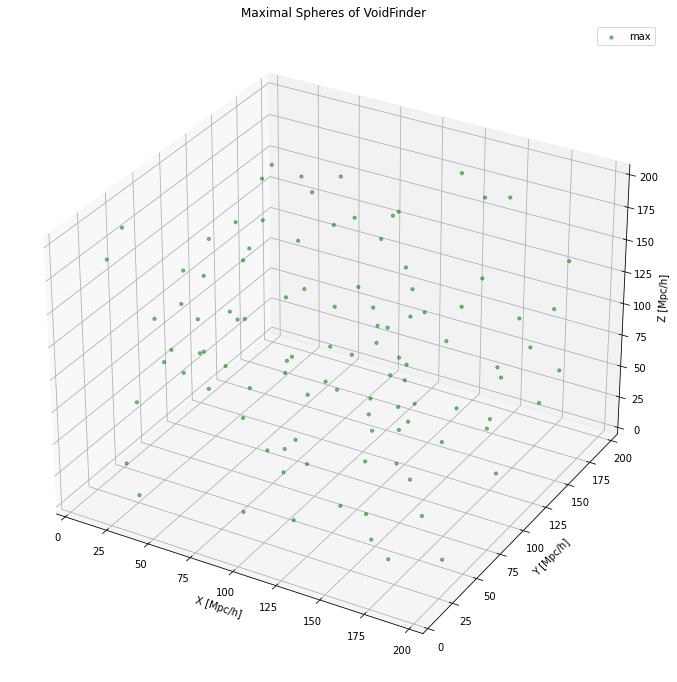

In [16]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_table_vf_max['x'],data_table_vf_max['y'], data_table_vf_max['z'],
           color = 'green', s=10, alpha=0.5,
           label='max')
ax.set(xlabel='X [Mpc/h]',
       ylabel='Y [Mpc/h]',
       zlabel='Z [Mpc/h]')

ax.legend(loc='upper right', fontsize=10)
plt.title("Maximal Spheres of VoidFinder");

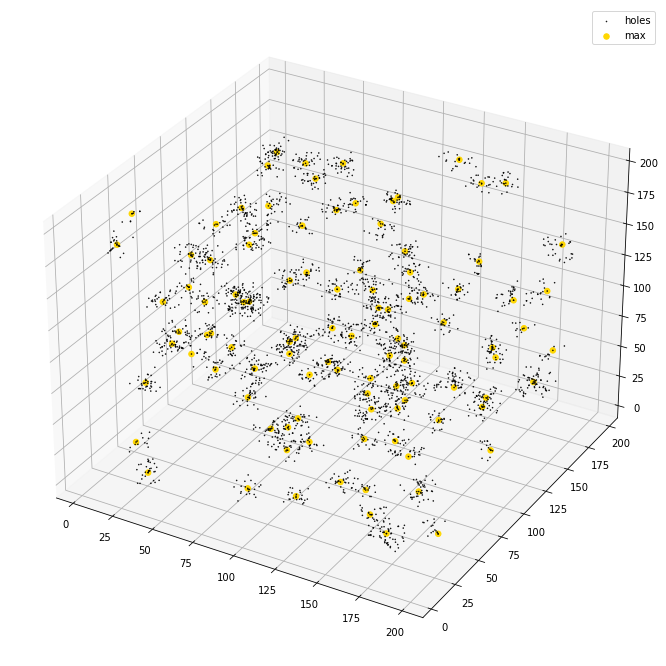

In [17]:
# p_size = 100
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(data_table_vf_holes['x'],data_table_vf_holes['y'], data_table_vf_holes['z'],
           color = 'black', s=0.3, alpha=1.0,
           label='holes')
ax.scatter(data_table_vf_max['x'],data_table_vf_max['y'],data_table_vf_max['z'],
           color = 'gold', s=30, alpha=1.0,
           label='max')
# ax.set(xlabel='X [Mpc/h]',
#        ylabel='Y [Mpc/h]',
#        zlabel='Z [Mpc/h]')

ax.legend(loc='upper right', fontsize=10)

# plt.title("Maximal Sphere and Holes of VoidFinder");

In [18]:
def calc_volume_boundaries(void_cat_A, void_cat_B):
    """Compute the boundaries of the minimal rectangular volume (parallelpiped)
    that completely contains two void catalogs.
    
    Parameters
    ----------
    void_cat_A : astropy.Table
        Table of void data from first catalog.
    void_cat_B : astropy.Table
        Table of void data from second catalog.
        
    Returns
    -------
    x_min : float
    x_max : float
    y_min : float
    y_max : float
    z_min : float
    z_max : float
    """
    x_min = np.minimum(np.min(void_cat_A['x']), np.min(void_cat_B['x']))
    x_max = np.maximum(np.max(void_cat_A['x']), np.max(void_cat_B['x']))
    
    y_min = np.minimum(np.min(void_cat_A['y']), np.min(void_cat_B['y']))
    y_max = np.maximum(np.max(void_cat_A['y']), np.max(void_cat_B['y']))

    z_min = np.minimum(np.min(void_cat_A['z']), np.min(void_cat_B['z']))
    z_max = np.maximum(np.max(void_cat_A['z']), np.max(void_cat_B['z']))

    return x_min, x_max, y_min, y_max, z_min, z_max

def generate_grid_points(x_min, x_max, y_min, y_max, z_min, z_max):
    """Creates a dense rectangular grid of points in 3D for the void volume calculation.
    
    Returns
    -------
    xyz : list
        2D list of points in 3D space.
    """
    x_range = np.arange(x_min, x_max,dtype=float)
    y_range = np.arange(y_min, y_max,dtype=float)
    z_range = np.arange(z_min, z_max,dtype=float)

    # Creating a meshgrid from the ranges to 
    X,Y,Z = np.meshgrid(x_range,y_range,z_range)

    x_points = np.ravel(X)
    y_points = np.ravel(Y)
    z_points = np.ravel(Z)
    
    point_coords = np.array([x_points, y_points, z_points])
    
    return point_coords

In [19]:
# #This line creates the boundaries (like the whole min and max)
# xmin, xmax, ymin, ymax, zmin, zmax = calc_volume_boundaries(data_table_vf_holes, data_table_V2)

# This line makes creates the points in between 
pts = generate_grid_points(0, 200, 0, 200, 0, 200)

(var, n_points) = pts.shape
b = pts.shape
print(b)
n_points
print(pts.dtype)

(3, 8000000)
float64


In [20]:
# # This is the cell to filter out all the points that we do not want 🥴
# start_time = time.time()

# rmin = 0
# rmax = 312.89816

# points_boolean = np.ones(pts.shape[1], dtype = bool)

# print(time.time() - start_time)

# start_time = time.time()
# for i in range(pts.shape[1]):
    
#     #   print(pts[:,i].reshape((1,3)).shape)
#     #   print(pts[:,i].reshape((1,3)))
#     #   print(pts[:,i])
#     points_boolean[i] = not_in_mask(pts[:,i].reshape((1,3)), mask, mask_resolution, rmin, rmax)        


# points_in_mask = pts[:,~points_boolean]
# print(time.time() - start_time)
# print(points_in_mask.shape)
# print(np.sum(points_boolean))
# print(np.sum(~points_boolean))
# print(points_boolean.shape)

In [21]:
# # should give me my good cone shape
# start_time = time.time()
# fig = plt.figure(figsize=(12, 12))
# ax = fig.add_subplot(projection='3d')
# ax.scatter(pts[0,:],pts[1,:], pts[2,:],
#            color = 'blue', s=10, alpha=0.5,
#            label='max')
# ax.set(xlabel='X [Mpc/h]',
#        ylabel='Y [Mpc/h]',
#        zlabel='Z [Mpc/h]')

# plt.title("Points");
# print(time.time() - start_time)

In [22]:
def point_query(point_coords, void_cat, vf):
    """We are creating a function to make a KDTree to find the number of points in 
    and out of a catalogue.
    
    Parameters
    ----------
    point_coords: ndarray has a shape of (3,N)
        This is the list of points to query the given void catalogue. N is the number of points given. 
    void_cat: Astropy Table
        This is the given void catalogue.
    vf: boolean 
        This tells me if my catalog is a vf catalog or not a vf catalog.
    
    Returns
    -------
    true_inside: ndarray of shape (N,1)
        Is this the boolean array of length N (same length as point_coords). True means that 1 point 
        is inside the hole.
    """
    
    cx = void_cat['x']
    cy = void_cat['y']
    cz = void_cat['z']

    sphere_coords = np.array([cx, cy, cz])

    start_time = time.time()

    #The .T is meant to transpose the array from (3,1054) to (1054,3)
    sphere_tree = neighbors.KDTree(sphere_coords.T)

    print(time.time() - start_time)

    start_time = time.time()

    dist, idx = sphere_tree.query(point_coords.T, k = 1)
    
    if vf:

        true_inside = dist < void_cat['radius'][idx]
    
    else: 
        """What goes into the square braket is whatever the name of the column that tells
        me what is in a wall and what in a void
        
        May need adjust 
        """

        true_inside = void_cat["CN"][idx] == 0
    
    return true_inside

In [23]:
start_time = time.time()

U = 121

count_in_vf = np.zeros(U)
count_out_vf = np.zeros(U)

count_in_CN = np.zeros(U)
count_out_CN = np.zeros(U)

inside_both = np.zeros(U)
inside_neither = np.zeros(U)
inside_a = np.zeros(U)
inside_b = np.zeros(U)

pts_copy = pts.copy()

for i in range(U): 
    
    delta = np.random.rand(3)
    
    #print(delta)
    
    pts_copy[0] = pts[0] + delta[0]
    pts_copy[1] = pts[1] + delta[1]
    pts_copy[2] = pts[2] + delta[2]
    
    #print(pts_copy[:,:10])
    
    true_inside_vf = point_query(pts_copy, data_table_vf_holes,True)

    count_in_vf[i] = np.sum(true_inside_vf)

    # The "~" inverts the array. So we have true_inside inverted to add up the falses instead of the trues
    count_out_vf[i] = np.sum(~true_inside_vf)


    #     total_vf = count_in_vf + count_out_vf

    true_inside_CN = point_query(pts_copy, data_table_galaxies,False)

    count_in_CN[i] = np.sum(true_inside_CN)

    # The "~" inverts the array. So we have true_inside inverted to add up the falses instead of the trues
    count_out_CN[i] = np.sum(~true_inside_CN)

    #     total_CN = count_in_CN + count_out_CN
    
    # This is the number of points that are inside both A and B
    inside_A_and_B = np.logical_and(true_inside_vf, true_inside_CN)
    inside_both[i] = np.sum(inside_A_and_B)
    
    # This is the number of points that are in neither A and B
    not_inside_A_and_B = np.logical_and(~true_inside_vf, ~true_inside_CN)
    inside_neither[i] = np.sum(not_inside_A_and_B)
    
    # This is the number of points that are in A but not B
    inside_A = np.logical_and(true_inside_vf, ~true_inside_CN)
    inside_a[i] = np.sum(inside_A)
    
    # This is the number of points that are not in A but are in B
    inside_B = np.logical_and(~true_inside_vf, true_inside_CN)
    inside_b[i] = np.sum(inside_B)

print(time.time() - start_time)
print('\nNumber of points inside VoidFinder: {}'.format(count_in_vf))
print('\nNumber of points outside VoidFinder: {}'.format(count_out_vf))
print('\nNumber of points inside Crossing Numbers: {}'.format(count_in_CN))
print('\nNumber of points outside Crossing Numbers: {}'.format(count_out_CN))
print("\nThis is the total number of points: {}".format(n_points))
# print("\nThis is the total number of points in Crossing Numbers: {}".format(total_CN))

0.0009667873382568359
0.9168918132781982
0.0007910728454589844
0.9743752479553223
0.0007607936859130859
0.9198489189147949
0.000823974609375
0.8210787773132324
0.0009591579437255859


KeyboardInterrupt: 

## This is the number of points that are inside both A and B

In [ ]:
inside_A_and_B = np.logical_and(true_inside_vf, true_inside_CN)

np.sum(inside_A_and_B), count_in_vf, count_in_CN

## This is the number of points that are in neither A and B

In [ ]:
not_inside_A_and_B = np.logical_and(~true_inside_vf, ~true_inside_CN)

np.sum(not_inside_A_and_B), count_in_vf, count_in_CN

## This is the number of points that are in A but not B

In [ ]:
inside_A = np.logical_and(true_inside_vf, ~true_inside_CN)

np.sum(inside_A)

## This is the number of points that are not in A but are in B

In [ ]:
inside_B = np.logical_and(~true_inside_vf, true_inside_CN)

np.sum(inside_B)

# Fraction of points: Calculate the ratios of the given sums

- in A
- in B
- in A & B
- in neither A nor B
- {in A, not B
- {in B, not A
-   |
-   |
- \ /
- The closer they are to zero, the more similar they are

## This is the ratio of A

In [ ]:
r_A = count_in_vf / n_points
print(r_A)

## This is the ratio of B

In [ ]:
r_B = count_in_CN / n_points
print(r_B)

## This is the ratio of both A and B

In [ ]:
r_AB = np.sum(inside_A_and_B) / n_points
print(r_AB)

## This is the ratio of neither A nor B

In [ ]:
r_notAB = np.sum(not_inside_A_and_B) / n_points
print(r_notAB)

## This is the ratio of A and not B

In [ ]:
r_A_not_B = np.sum(inside_A) / n_points
print(r_A_not_B)

## This is the ratio of B and not A

In [ ]:
r_B_not_A = np.sum(inside_B) / n_points
print(r_B_not_A)

In [ ]:
Sum = r_AB + r_notAB + r_A_not_B + r_B_not_A

In [ ]:
Sum

# This will be the Standard Deviation and Mean of the Data


## This is the STD and Mean of vf


In [ ]:
average_vf = np.mean(count_in_vf)
r_average_vf = average_vf / n_points

std_vf = np.std(count_in_vf)
r_std_vf = std_vf / n_points

print(r_average_vf)
print(std_vf )
print(r_std_vf)

## This is the STD and Mean of CN


In [ ]:
average_CN = np.mean(count_in_CN)
r_average_CN = average_CN / n_points

std_CN = np.std(count_in_CN)
r_std_CN = std_CN / n_points

print(r_average_CN)
print(std_CN )
print(r_std_CN)



## This is the STD and Mean of Both 

In [ ]:
average_both = np.mean(inside_both)
r_average_both = average_both / n_points

std_both = np.std(inside_both)
r_std_both = std_both / n_points

print(r_average_both)
print(std_both )
print(r_std_both)

4.632
0.0023

In [ ]:
average_neither = np.mean(inside_neither)
r_average_neither = average_neither / n_points

std_neither = np.std(inside_neither)
r_std_neither = std_neither / n_points

print(r_average_neither)
print(std_neither )
print(r_std_neither)

54.695


In [ ]:
average_a = np.mean(inside_a)
r_average_a = average_a / n_points

std_a = np.std(inside_a)
r_std_a = std_a / n_points

print(r_average_a)
print(std_a )
print(r_std_a)

9.890
0.0042

In [ ]:
average_b = np.mean(inside_b)
r_average_b = average_b / n_points

std_b = np.std(inside_b)
r_std_b = std_b / n_points

print(r_average_b)
print(std_b )
print(r_std_b)

30.775
0.0076